## Quantile Regression

- 종속변수의 조건부 분위수 값(conditional 𝜏-quantile) 추정 

In [ ]:
# statsmodels 라이브러리의 QuantReg 클래스를 사용하여 분위수 회귀를 구현

In [ ]:
# 종속 변수의 조건부 중앙값이나 다른 분위수를 예측하는 데 사용됩니다. 
# 전통적인 최소제곱 회귀분석이 종속변수의 조건부 평균을 모델링하는 데 반해, 
# 분위수 회귀는 데이터의 다양한 분위수에 대한 조건부 값을 모델링하여 더 폭넓은 데이터 구조를 이해할 수 있게 해줍니다.

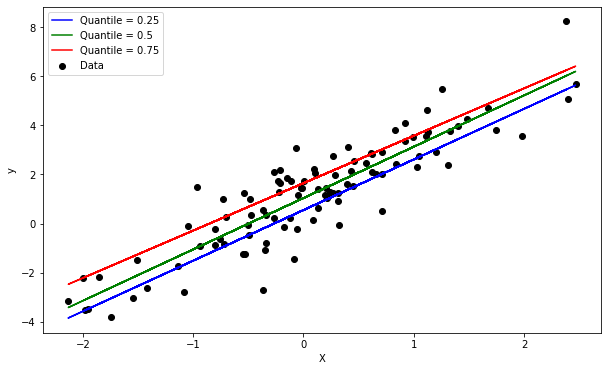

Quantile = 0.25
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5837
Model:                       QuantReg   Bandwidth:                      0.8204
Method:                 Least Squares   Sparsity:                        2.846
Date:                Mon, 18 Mar 2024   No. Observations:                  100
Time:                        14:46:32   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5497      0.126      4.369      0.000       0.300       0.799
x1             2.0622      0.141     14.594      0.000       1.782       2.343
Quantile = 0.5
                         QuantReg Regression Results                          
Dep. Variable:       

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 임의의 데이터 생성, 독립변수 한개의 경우
np.random.seed(10)
X = np.random.normal(0, 1, 100)
X = sm.add_constant(X)  # 상수항 추가--회귀 분석에서 절편을 포함하기 위함입니다.
beta = [1, 2]  # 실제 파라미터
y = beta[0] + beta[1]*X[:,1] + np.random.normal(0, 1, 100)

# 분위수 리스트: 세 가지 분위수(0.25, 0.5, 0.75)에 대해 분위수 회귀 모델을 적합시킵니다.
quantiles = [0.25, 0.5, 0.75]

# 분위수 회귀 모델 적합 및 결과 저장
models = []
predictions = []
for qt in quantiles:
    mod = sm.QuantReg(y, X).fit(q=qt)
    pred = mod.predict(X)
    models.append(mod)
    predictions.append(pred)

# 결과 시각화 : 각 분위수에 대한 회귀선을 데이터와 함께 시각화합니다.

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='black', marker='o', label='Data')
colors = ['blue', 'green', 'red']
for pred, qt, color in zip(predictions, quantiles, colors):
    plt.plot(X[:, 1], pred, color=color, label=f'Quantile = {qt}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 모델 요약 출력: 각 분위수 회귀 모델의 요약 정보를 출력합니다
for model, qt in zip(models, quantiles):
    print(f'Quantile = {qt}')
    print(model.summary())


In [ ]:
# 부동산 가격 사례

In [ ]:
# 가상의 부동산 데이터를 생성하여 사용. 
# 데이터는 집의 크기(제곱미터)와 해당 집의 가격(만 달러)으로 구성됩니다. 
# 목표는 집의 크기에 따른 가격의 중앙값(0.5 분위수)과 다른 분위수를 예측하는 것입니다.

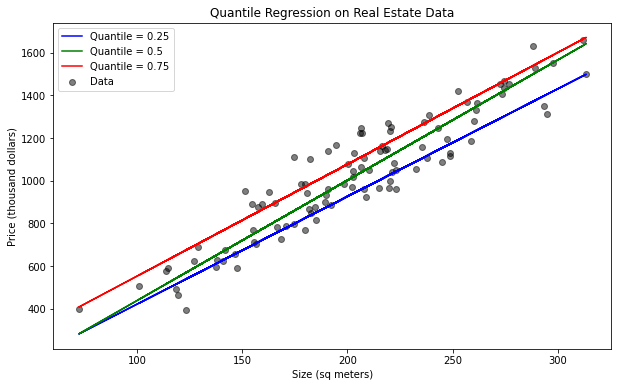

Quantile = 0.25
                         QuantReg Regression Results                          
Dep. Variable:                  Price   Pseudo R-squared:               0.6634
Model:                       QuantReg   Bandwidth:                       116.5
Method:                 Least Squares   Sparsity:                        346.5
Date:                Mon, 18 Mar 2024   No. Observations:                  100
Time:                        14:50:42   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.1525     65.997     -1.260      0.211    -214.122      47.817
Size           5.0437      0.319     15.831      0.000       4.411       5.676
Quantile = 0.5
                         QuantReg Regression Results                          
Dep. Variable:       

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 가상의 부동산 데이터 생성
# 여기서는 집의 크기와 가격 사이의 선형 관계를 가정하되, 노이즈를 추가하여 실제 데이터의 변동성을 모방합니다.
np.random.seed(0)
size = np.random.normal(200, 50, 100)  # 평균 200제곱미터, 표준편차 50인 집의 크기
price = 5 * size + np.random.normal(0, 100, 100)  # 기본 가격에 노이즈 추가

# 데이터프레임 생성
data = pd.DataFrame({'Size': size, 'Price': price})

# 분위수 회귀 모델 적합
# 데이터프레임을 생성하고, 분위수 회귀 모델을 각각의 분위수(0.25, 0.5, 0.75)에 대해 적합시킵니다.

X = sm.add_constant(data['Size'])  # 상수항 추가
quantiles = [0.25, 0.5, 0.75]
models = {}
predictions = {}

for qt in quantiles:
    mod = sm.QuantReg(data['Price'], X).fit(q=qt)
    models[qt] = mod
    predictions[qt] = mod.predict(X)

# 결과 시각화
# 각 분위수에 대한 회귀선을 원본 데이터와 함께 시각화하여, 집의 크기에 따른 가격의 분포를 다각도로 분석합니다.

plt.figure(figsize=(10, 6))
plt.scatter(data['Size'], data['Price'], color='black', alpha=0.5, label='Data')
colors = ['blue', 'green', 'red']
for qt, color in zip(quantiles, colors):
    plt.plot(data['Size'], predictions[qt], color=color, label=f'Quantile = {qt}')
plt.xlabel('Size (sq meters)')
plt.ylabel('Price (thousand dollars)')
plt.title('Quantile Regression on Real Estate Data')
plt.legend()
plt.show()

# 모델 요약 출력
# 각 분위수 회귀 모델의 요약 정보를 출력하여, 모델의 세부 사항을 검토합니다.

for qt in quantiles:
    print(f'Quantile = {qt}')
    print(models[qt].summary())
